In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(
    "readability_scores100kword.csv",
    on_bad_lines="skip"  # Abaikan baris bermasalah
)
# Menampilkan 5 baris pertama
df.head()


,s_id,sentence,word_count,avg_word_length,flesch_score
0,1,Bila perlu ia juga dapat mengambil organ dari ...,11,4.45,70.05
1,2,Dia juga bilang bahwa ramuan ini juga pernah d...,17,5.18,43.60
2,3,"Di siang hari ia tampak seperti manusia biasa,...",30,5.27,27.87
3,4,Jika kepala tersebut terpisah pada jangka wakt...,14,4.79,57.67
4,5,"Kalo sudah bgt, korban tak akan kembali lagi k...",12,3.75,88.91


In [3]:
df.isna().sum()

s_id               0
sentence           0
word_count         0
avg_word_length    0
flesch_score       0
dtype: int64

In [4]:
df.describe()


,s_id,word_count,avg_word_length,flesch_score
count,99164.000000,99164.000000,99164.000000,99164.000000
mean,50073.141805,17.192933,5.475793,34.973815
std,28829.957133,8.221381,0.786541,24.285900
min,1.000000,3.000000,2.000000,-110.670000
25%,25135.750000,11.000000,5.000000,18.840000
50%,50144.500000,16.000000,5.460000,34.430000
75%,74976.250000,22.000000,6.000000,50.610000
max,100000.000000,59.000000,11.000000,143.330000


In [5]:
# Contoh data
df = pd.read_csv("readability_scores100kword.csv", on_bad_lines="skip")

# Fitur dan target
X = df[["word_count", "avg_word_length"]]
y = df["flesch_score"]

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model baseline
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, 0, 100)


print(df["flesch_score"].describe())
print(df[df["flesch_score"] > 100])


# Evaluasi
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)


count    99164.000000
mean        34.973815
std         24.285900
min       -110.670000
25%         18.840000
50%         34.430000
75%         50.610000
max        143.330000
Name: flesch_score, dtype: float64
        s_id                                    sentence  word_count  \
60        61                   79. SEMUA : Sangat sakit.           6   
281      282                “Eh bagian depannya juga ya?           7   
355      356                   ” “Aku sudah mulai lelah!           7   
543      544   ” “Memang sakit sih, tapi aku juga namja.          11   
563      564                    “Hyung mau nonton drama!           6   
...      ...                                         ...         ...   
97612  98430             \Gila loe Fer mau lawan Chris."           8   
97654  98475                   5 juta untuk 1 anak saja.           7   
97717  98542                     \ Saya bisa sampai Rp."           6   
97918  98747                         Ryan juga ikut kok.           5 

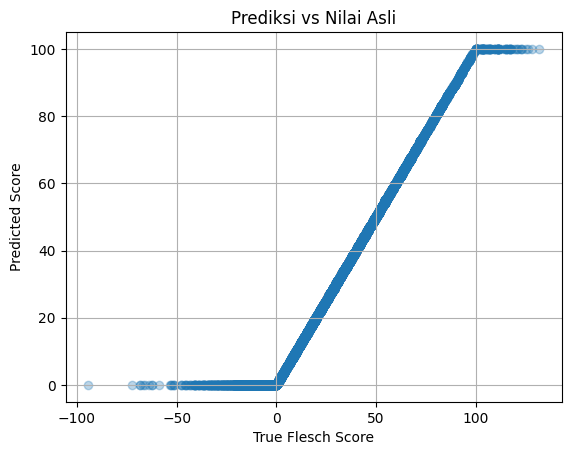

In [14]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("True Flesch Score")
plt.ylabel("Predicted Score")
plt.title("Prediksi vs Nilai Asli")
plt.grid(True)
plt.show()


In [6]:
# 1Simpan model ke file
import joblib

# Asumsikan variabel model adalah LinearRegression yang sudah dilatih
joblib.dump(model, "readability_model.pkl")
print("Model disimpan sebagai 'readability_model.pkl'")

Model disimpan sebagai 'readability_model.pkl'


In [7]:
# Program cek skor readability dari input teks
import re
import joblib

# Fungsi untuk menghitung jumlah kata, kalimat, dan suku kata
def count_syllables(word):
    word = word.lower()
    syllables = re.findall(r'[aeiouy]+', word)
    return max(1, len(syllables))

def text_stats(text):
    sentences = re.split(r'[.!?]+', text)
    sentences = [s.strip() for s in sentences if s.strip()]
    words = re.findall(r'\w+', text)
    syllables = sum(count_syllables(w) for w in words)
    return {
        "words": len(words),
        "sentences": len(sentences),
        "syllables": syllables
    }

# Load model dan cek skor
model = joblib.load("readability_model.pkl")

text = ("uklir; Pusat Riset Teknologi Proses Radiasi; Pusat Riset Teknologi Radioisotop, Radiofarmaka, dan Biodosimetri; serta Pusat Riset Teknologi Reaktor Nuklir")
stats = text_stats(text)

# Hitung features: Words per Sentence & Syllables per Word
wps = stats["words"] / stats["sentences"]
spw = stats["syllables"] / stats["words"]

predicted_score = model.predict([[wps, spw]])[0]
print(f"Prediksi skor keterbacaan: {predicted_score:.2f}")

Prediksi skor keterbacaan: 110.38


C:\Users\Danang ARA\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
